In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/harsnyi/Documents/NYC-Crash-Analysis/data/NYC_crashes_weather_combined.csv")

/var/folders/tw/j102_3791q18mc8161tjddq00000gn/T/ipykernel_7324/4069927606.py:1: DtypeWarning: Columns (2,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/harsnyi/Documents/NYC-Crash-Analysis/data/NYC_crashes_weather_combined.csv")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955319 entries, 0 to 1955318
Data columns (total 44 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   Unnamed: 0                     int64  
 1   BOROUGH                        object 
 2   ZIP CODE                       object 
 3   LATITUDE                       float64
 4   LONGITUDE                      float64
 5   LOCATION                       object 
 6   ON STREET NAME                 object 
 7   CROSS STREET NAME              object 
 8   OFF STREET NAME                object 
 9   NUMBER OF PERSONS INJURED      float64
 10  NUMBER OF PERSONS KILLED       float64
 11  NUMBER OF PEDESTRIANS INJURED  int64  
 12  NUMBER OF PEDESTRIANS KILLED   int64  
 13  NUMBER OF CYCLIST INJURED      int64  
 14  NUMBER OF CYCLIST KILLED       int64  
 15  NUMBER OF MOTORIST INJURED     int64  
 16  NUMBER OF MOTORIST KILLED      int64  
 17  CONTRIBUTING FACTOR VEHICLE 1  object 
 18  CO

In [4]:
# Example conditions for categorizing weather
def categorize_weather(row):
    if row['precipitation (mm)'] > 0:
        return 'Rainy'
    elif row['windspeed_10m (km/h)'] > 20:
        return 'Windy'
    elif row['cloudcover (%)'] < 50:
        return 'Clear'
    else:
        return 'Cloudy'

# Apply the categorization
df['weather_condition'] = df.apply(categorize_weather, axis=1)

In [5]:
crash_weather_analysis = df.groupby('weather_condition').agg(
    crash_count=('crash_time', 'size'),
    avg_temperature=('temperature_2m (°C)', 'mean'),
    avg_precipitation=('precipitation (mm)', 'mean'),
    avg_windspeed=('windspeed_10m (km/h)', 'mean')
).reset_index()

In [6]:
crash_weather_analysis

,weather_condition,crash_count,avg_temperature,avg_precipitation,avg_windspeed
0,Clear,622124,14.242826,0.000000,10.156379
1,Cloudy,1069665,13.470082,0.000000,9.908835
2,Rainy,180410,13.987358,0.932195,13.241876
3,Windy,83120,7.563900,0.000000,24.195932


In [7]:
df.describe()

,Unnamed: 0,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,...,DAY,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°)
count,1.955319e+06,1.737949e+06,1.737949e+06,1.955301e+06,1.955288e+06,1.955319e+06,1.955319e+06,1.955319e+06,1.955319e+06,1.955319e+06,...,1.955319e+06,1.210861e+06,1.210861e+06,1.210861e+06,1.210861e+06,1.210861e+06,1.210861e+06,1.210861e+06,1.210861e+06,1.210791e+06
mean,9.776590e+05,4.062292e+01,-7.374305e+01,3.092087e-01,1.488783e-03,5.588909e-02,7.395213e-04,2.693883e-02,1.166050e-04,2.226895e-01,...,1.567228e+01,1.353875e+01,1.388907e-01,1.285723e-01,4.667534e+01,2.755266e+01,3.043221e+01,3.996613e+01,1.151336e+01,2.041252e+02
std,5.644521e+05,2.031052e+00,3.819166e+00,6.992144e-01,4.054737e-02,2.429345e-01,2.770586e-02,1.639700e-01,1.084501e-02,6.603800e-01,...,8.758395e+00,9.976544e+00,5.588779e-01,5.418766e-01,3.849401e+01,3.786487e+01,3.707928e+01,4.235891e+01,5.976202e+00,1.013290e+02
min,0.000000e+00,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,-1.830000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,4.888295e+05,4.066795e+01,-7.397444e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,8.000000e+00,5.300000e+00,0.000000e+00,0.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.200000e+00,1.240000e+02
50%,9.776590e+05,4.072080e+01,-7.392660e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.600000e+01,1.400000e+01,0.000000e+00,0.000000e+00,3.700000e+01,3.000000e+00,1.000000e+01,1.900000e+01,1.050000e+01,2.250000e+02
75%,1.466488e+06,4.076990e+01,-7.386643e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.300000e+01,2.210000e+01,0.000000e+00,0.000000e+00,9.000000e+01,5.300000e+01,5.900000e+01,9.100000e+01,1.480000e+01,2.890000e+02
max,1.955318e+06,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,...,3.100000e+01,3.550000e+01,1.920000e+01,1.920000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,4.720000e+01,3.600000e+02


In [8]:
crash_weather_monthly = df.groupby(['YEAR', 'MONTH']).agg(
    crash_count=('crash_time', 'size'),
    avg_temperature=('temperature_2m (°C)', 'mean'),
    sum_precipitation=('precipitation (mm)', 'sum'),
    avg_windspeed=('windspeed_10m (km/h)', 'mean')
).reset_index()

In [9]:
crash_weather_monthly.head(50)

,YEAR,MONTH,crash_count,avg_temperature,sum_precipitation,avg_windspeed
0,2013,1,15643,NaN,0.0,NaN
1,2013,2,14399,NaN,0.0,NaN
2,2013,3,16509,NaN,0.0,NaN
3,2013,4,16439,NaN,0.0,NaN
4,2013,5,18488,NaN,0.0,NaN
5,2013,6,18205,NaN,0.0,NaN
6,2013,7,17578,NaN,0.0,NaN
7,2013,8,16759,NaN,0.0,NaN
8,2013,9,16956,NaN,0.0,NaN
9,2013,10,17713,NaN,0.0,NaN


In [10]:
correlation = crash_weather_monthly[['sum_precipitation', 'crash_count']].corr()

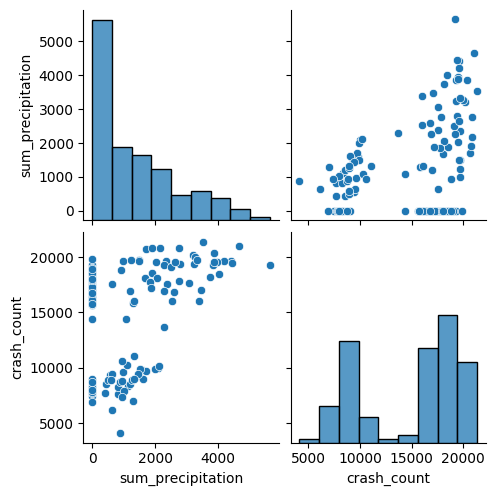